In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

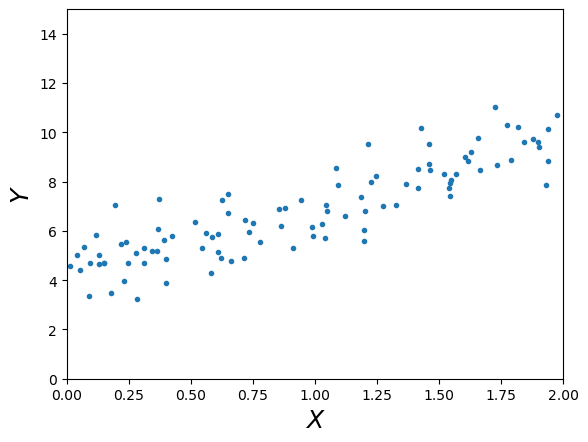

In [39]:
plt.plot(x, y, '.')
plt.xlabel("$X$", fontsize = 18)
plt.ylabel("$Y$", fontsize = 18)
plt.axis([0, 2, 0, 15]);

### MBGD

In [71]:
def mbgd(X, Y, epoches, l_rate):
    np.random.seed(42)
    mb_size = 20
    m = len(X)
    X_b = np.append(np.ones((m, 1)), X, axis = 1)
    W = np.random.randn(X_b.shape[1], 1)
    for epoch in range(epoches):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = Y[shuffled_indices]
        for i in range(0,m ,mb_size):
            xi = X_b_shuffled[i:i+mb_size]
            yi = y_shuffled[i:i+mb_size]
            gradients = 2/mb_size * xi.T.dot(xi.dot(W) - yi)
            cost = 1/m * np.sum(np.square(xi.dot(W) - yi))
            W = W - l_rate * gradients
    return W, cost

mbgd(x, y,100, 0.01)        

(array([[4.09595474],
        [2.87229116]]),
 0.0800634347667114)

### Predection

In [72]:
def predect(X, W = mbgd(x, y, 50, 0.02)[0]):
    X_b = np.append(np.ones((len(X), 1)), X, axis = 1)
    predections = X_b.dot(W)
    return predections
new_x = np.array([[0], [1], [2]])
predections = predect(new_x)
predections

array([[4.09679832],
       [6.96859911],
       [9.84039989]])

(0.0, 2.0, 0.0, 15.0)

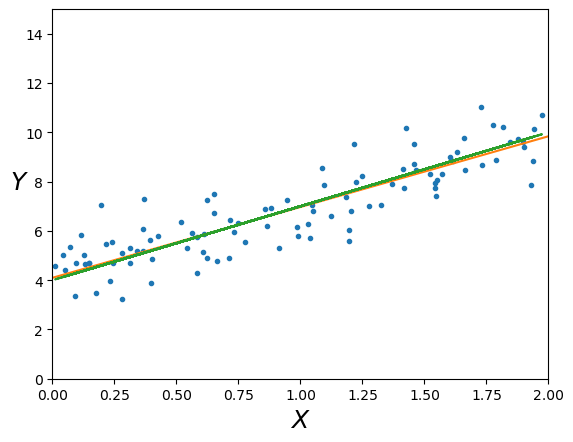

In [73]:
plt.plot(x, y, '.')
plt.plot(new_x, predections, '-')
plt.plot(x, 4+3*x, '-')
plt.xlabel('$X$', fontsize = 18)
plt.ylabel('$Y$', fontsize = 18, rotation = 0)
plt.axis([0, 2, 0, 15])